# **Customer Churn**

**Bu vazifa orqali Data Science jarayoni:**

✔️ maʼlumot tayyorlash;

  ✔️ model qurish;

  ✔️ baholash;

  ✔️ natijalarni tahlil qilish
  kabi koʻnikmalarga ega bo'lish.

# **Vazifa: bank mijozlarining noroziligini bashorat qilish**

**Vazifa tavsifi**

Sizga bank mijozlari haqida maʼlumotlar toʻplami berilgan. Maqsad – qaysi mijozlar bank xizmatlaridan voz kechishini (churn) oldindan bashorat qilish. Bank bu orqali oʻz mijozlarini ushlab qolish strategiyalarini yaxshilashi mumkin.

**Maʼlumotlar toʻplami**

Kaggle platformasidagi Churn Modelling maʼlumotlar toʻplamidan foydalanamiz. Ushbu toʻplamda 10 000 ta mijozning quyidagi maʼlumotlari mavjud:

- mijoz identifikatori (RowNumber, CustomerId, Surname);
- geografik joylashuvi (Geography);
- jinsi (Gender);
- yoshi (Age);
- kredit balli (CreditScore);
- yillik daromadi (EstimatedSalary);
- bankda qancha vaqtdan beri mijoz ekani (Tenure);
- qancha mahsulotdan foydalanishi (NumOfProducts);
- faoliyati (HasCrCard, IsActiveMember);
- balans (Balance);
- prognoz qilish holati, churn (Exited) – maqsadli oʻzgaruvchi.

**Topshiriqlar**

1. **Maʼlumotlarni tahlil qilish va tozalash:**
   - Maʼlumotlardagi boʻsh qiymatlar va anomaliyalarni aniqlang hamda tozalash.
   - Kategorik oʻzgaruvchilarni raqamli koʻrinishga o'tkazish (masalan, one-hot encoding yordamida).

2. **Maʼlumotlarni boʻlish:**
   - Maʼlumotlarni training va test toʻplamlariga ajratish (masalan, 80% training, 20% test).

3. **Model qurish:**
   - Quyidagi algoritmlar yordamida modellarni yaratish:
     - Logistic Regression
     - Support Vector Machine (SVM)
     - Decision Tree
     - Random Forest
     - XGBoost

4. **Modellarni baholash:**
   - Har bir model uchun quyidagi koʻrsatkichlarni hisoblash:
     - Aniqlik (Accuracy)
     - Toʻgʻrilik (Precision)
     - Recall
     - F1-score

5. **Natijalarni tahlil qilish:**
   - Olingan natijalarni solishtiring va qaysi model eng yaxshi ishlashini aniqlash.
   - Eng yaxshi model asosida bankka mijozlarni ushlab qolish boʻyicha tavsiyalar berish.
---


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.tree import plot_tree
from sklearn import metrics

from sklearn.compose import ColumnTransformer

url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Churn_Modelling.xls"
df = pd.read_csv(url, index_col='RowNumber')
df = df.drop(['CustomerId', 'Surname'], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploring dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [22]:
df.shape

(10000, 11)

In [23]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [24]:
print(df.Gender.value_counts(), df.Geography.value_counts(), sep = '\n\n')

Gender
Male      5457
Female    4543
Name: count, dtype: int64

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


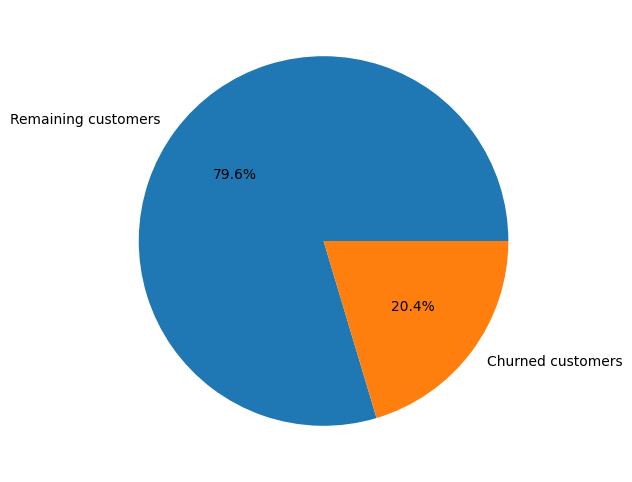

In [25]:
churn_rate = df['Exited'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    churn_rate,
    labels=['Remaining customers', 'Churned customers'],
    autopct='%1.1f%%'
)
plt.show()

# Correlation

In [26]:
encoder = LabelEncoder()
df_corr = df
df_corr['Gender'] = encoder.fit_transform(df_corr['Gender'])
df_corr['Geography'] = encoder.fit_transform(df_corr['Geography'])

df_corr.corr().abs()

df_corr.corr().abs().style.background_gradient(cmap = "coolwarm")

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,0.002857,0.003965,0.000842,0.006268,0.012238,0.005458,0.025651,0.001384,0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,0.008523,0.006724,0.001369,0.035943
Gender,0.002857,0.004719,1.000000,0.027544,0.014733,0.012087,0.021859,0.005766,0.022544,0.008112,0.106512
Age,0.003965,0.022812,0.027544,1.000000,0.009997,0.028308,0.030680,0.011721,0.085472,0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,0.009997,1.000000,0.012254,0.013444,0.022583,0.028362,0.007784,0.014001
Balance,0.006268,0.069408,0.012087,0.028308,0.012254,1.000000,0.304180,0.014858,0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,0.021859,0.030680,0.013444,0.304180,1.000000,0.003183,0.009612,0.014204,0.047820
HasCrCard,0.005458,0.008523,0.005766,0.011721,0.022583,0.014858,0.003183,1.000000,0.011866,0.009933,0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,0.028362,0.010084,0.009612,0.011866,1.000000,0.011421,0.156128
EstimatedSalary,0.001384,0.001369,0.008112,0.007201,0.007784,0.012797,0.014204,0.009933,0.011421,1.000000,0.012097


In [27]:
df_corr.corrwith(df['Exited']).abs().sort_values(ascending=False)

,0
Exited,1.000000
Age,0.285323
IsActiveMember,0.156128
Balance,0.118533
Gender,0.106512
NumOfProducts,0.047820
Geography,0.035943
CreditScore,0.027094
Tenure,0.014001
EstimatedSalary,0.012097


# Visualization

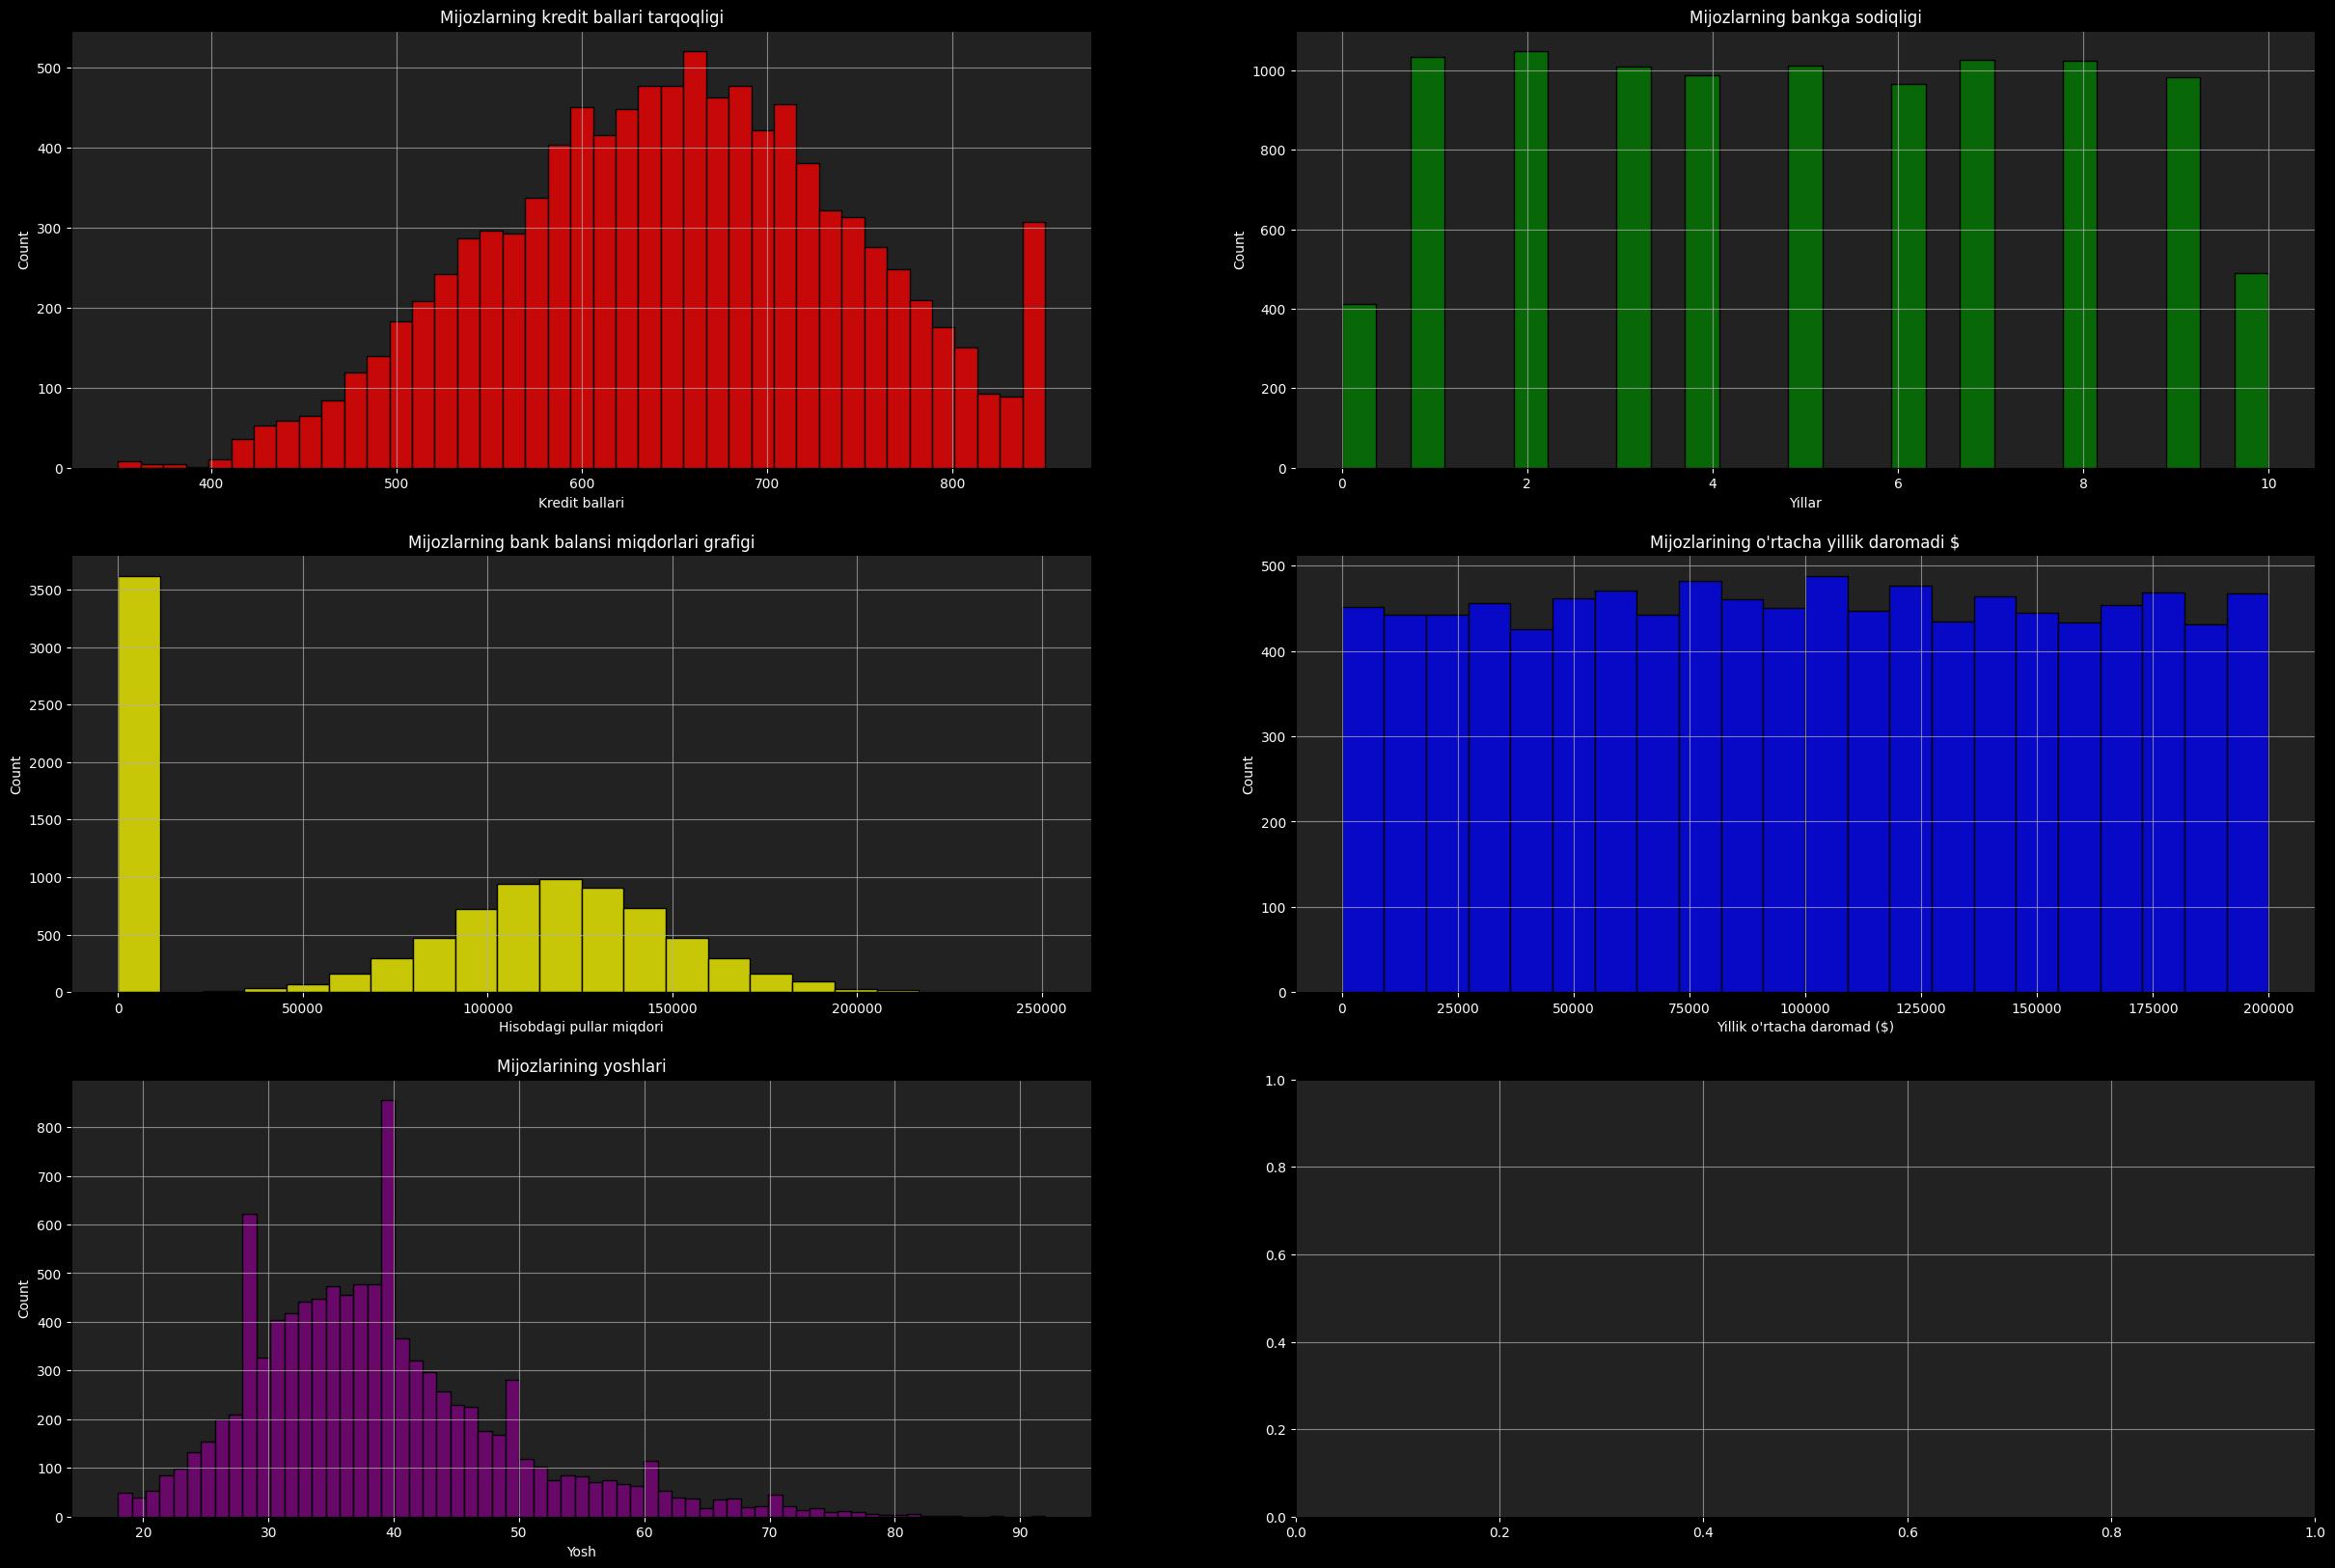

In [70]:
fig, axes = plt.subplots(3, 2, figsize = (30, 20))

sns.histplot(data=df, x='CreditScore', ax = axes[0][0], color="red")
axes[0][0].set_title("Mijozlarning kredit ballari tarqoqligi")
axes[0][0].set_xlabel("Kredit ballari")

sns.histplot(data=df, x='Tenure', ax = axes[0][1], color='green')
axes[0][1].set_title("Mijozlarning bankga sodiqligi")
axes[0][1].set_xlabel("Yillar")

sns.histplot(data=df, x='Balance', ax = axes[1][0], color='yellow')
axes[1][0].set_title("Mijozlarning bank balansi miqdorlari grafigi")
axes[1][0].set_xlabel("Hisobdagi pullar miqdori")

sns.histplot(data=df, x="EstimatedSalary", ax = axes[1][1], color='Blue')
axes[1][1].set_title("Mijozlarining o'rtacha yillik daromadi $")
axes[1][1].set_xlabel("Yillik o'rtacha daromad ($)")

sns.histplot(data=df, x="Age", ax = axes[2][0], color='purple')
axes[2][0].set_title("Mijozlarining yoshlari")
axes[2][0].set_xlabel("Yosh")


[ax.grid(True, alpha = 0.7) for ax in axes.ravel()]

fig.patch.set_facecolor("black")
for ax in axes.ravel():
    ax.set_facecolor("#222222")
    ax.tick_params(colors="white")
    ax.yaxis.label.set_color("white")
    ax.xaxis.label.set_color("white")
    ax.title.set_color("white")


plt.show()

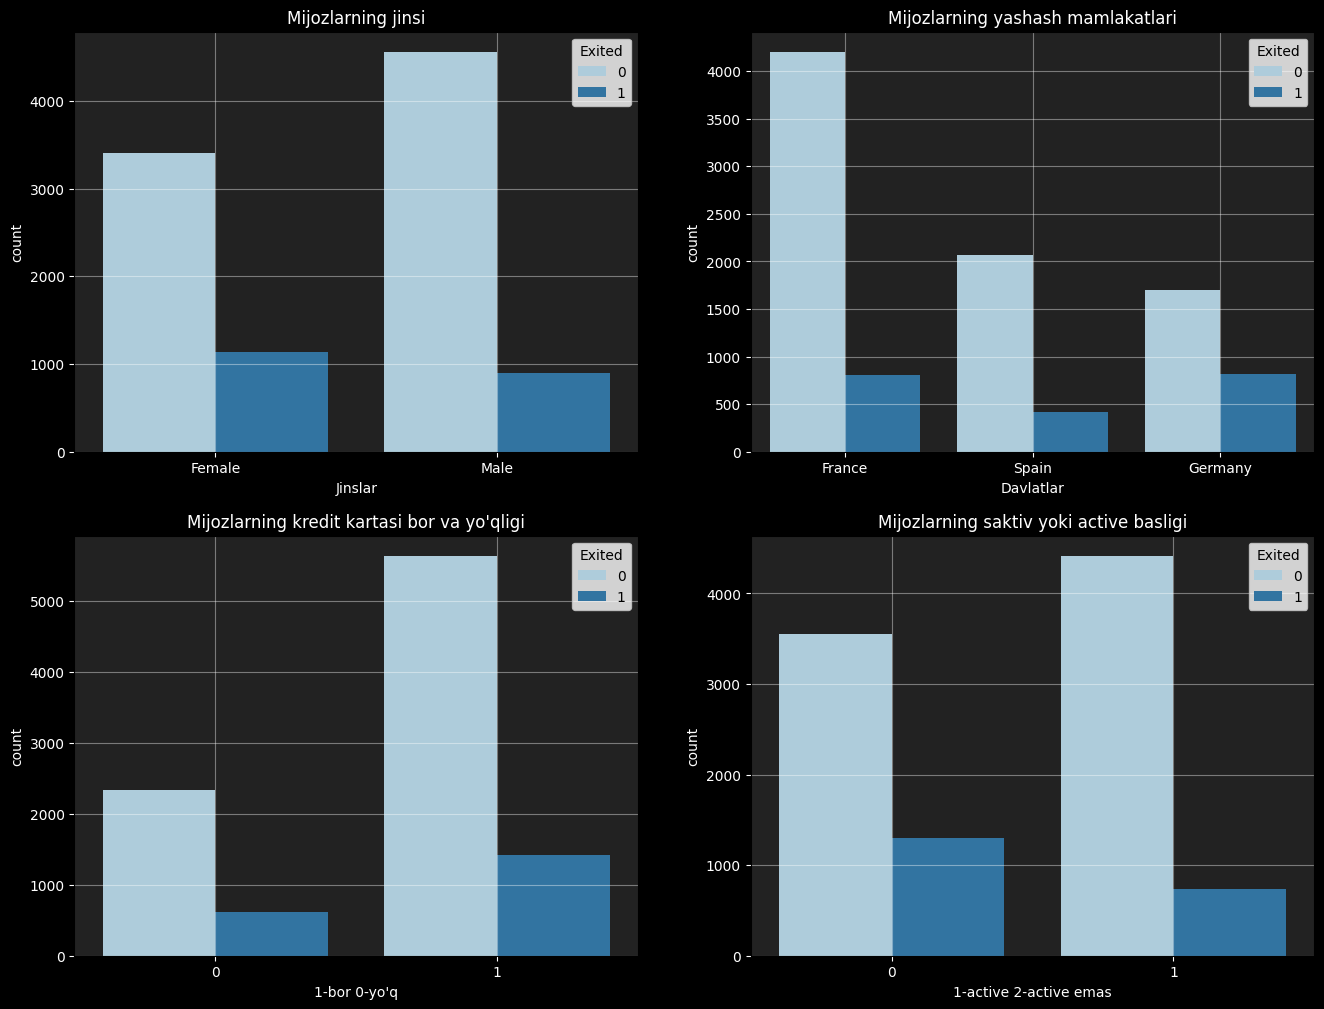

In [83]:
fig, axes = plt.subplots(2, 2, figsize = (16, 12))

sns.countplot(data = df, x = 'Gender', hue = 'Exited', ax = axes[0][0], palette='Paired')
axes[0][0].set_title("Mijozlarning jinsi")
axes[0][0].set_xlabel("Jinslar")

sns.countplot(data = df, x = 'Geography', hue = 'Exited', ax = axes[0][1], palette='Paired')
axes[0][1].set_title("Mijozlarning yashash mamlakatlari")
axes[0][1].set_xlabel("Davlatlar")

sns.countplot(data = df, x = 'HasCrCard', hue = 'Exited', ax = axes[1][0], palette='Paired')
axes[1][0].set_title("Mijozlarning kredit kartasi bor va yo'qligi")
axes[1][0].set_xlabel("1-bor 0-yo'q")

sns.countplot(data = df, x = 'IsActiveMember', hue = 'Exited', ax = axes[1][1], palette='Paired')
axes[1][1].set_title("Mijozlarning saktiv yoki active basligi")
axes[1][1].set_xlabel("1-active 2-active emas")


[ax.grid(True, alpha = 0.4,color = 'white') for ax in axes.ravel()]

fig.patch.set_facecolor("black")
for ax in axes.ravel():
    ax.set_facecolor("#222222")
    ax.tick_params(colors="white")
    ax.yaxis.label.set_color("white")
    ax.xaxis.label.set_color("white")
    ax.title.set_color("white")


plt.show()

# Pipeline

In [85]:
cat_cols = ['Geography', 'Gender']
non_num_cols = ['Geography', 'Gender', 'Exited']
num_cols = list(df.drop(non_num_cols, axis = 1).columns)

pipeline = ColumnTransformer([
    ('cat_pipeline', OneHotEncoder(), cat_cols),
    ('num_pipeline', StandardScaler(), num_cols)
])

In [86]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

# Train test split

In [98]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_full_prepared = pipeline.fit_transform(X)
X_train_prepared = pipeline.transform(X_train)
X_test_prepared = pipeline.transform(X_test)

# ML

# Logistic Regression

Classification report : 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuraccy score : 0.811




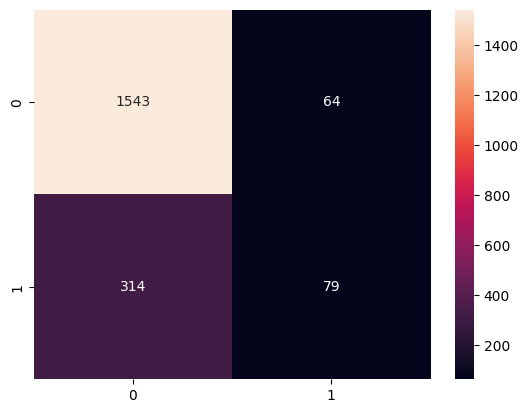

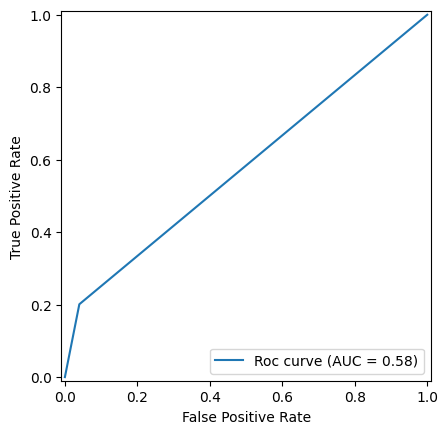

In [99]:
LR_model = LogisticRegression()
LR_model.fit(X_train_prepared, y_train)

y_predict = LR_model.predict(X_test_prepared)


print(f'Classification report : \n{metrics.classification_report(y_test, y_predict)}')
print(f'Accuraccy score : {metrics.accuracy_score(y_test, y_predict)}\n\n')

conf_matrix = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()

# SVC model

Classification report : 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.79      0.37      0.51       393

    accuracy                           0.86      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.85      0.86      0.84      2000

Accuraccy score : 0.857




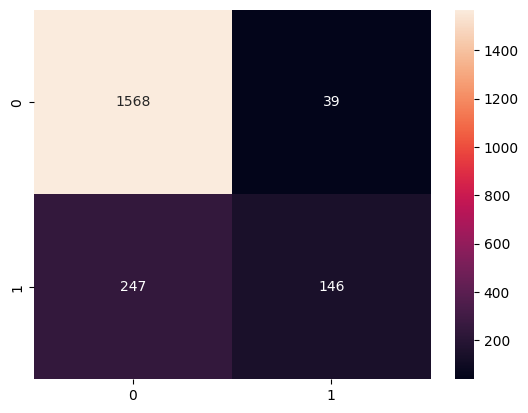

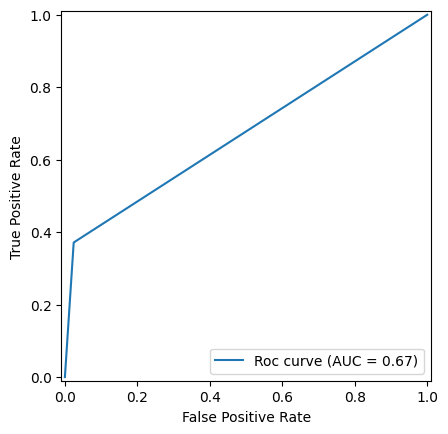

In [100]:
SV_model = SVC()
SV_model.fit(X_train_prepared, y_train)

y_predict = SV_model.predict(X_test_prepared)

print(f'Classification report : \n{metrics.classification_report(y_test, y_predict)}')
print(f'Accuraccy score : {metrics.accuracy_score(y_test, y_predict)}\n\n')

conf_matrix = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()

# Decison Tree

In [108]:
tree_model = DecisionTreeClassifier()
params = {'max_depth' : np.arange(1, 100)}
tree_model_gs = GridSearchCV(estimator=tree_model, param_grid = params, cv = 5)
tree_model_gs.fit(X_full_prepared, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [111]:
scores = tree_model_gs.cv_results_['rank_test_score']

In [113]:
tree_model_gs.best_score_

np.float64(0.857)

In [118]:
tree_model_gs.best_params_['max_depth']

np.int64(6)

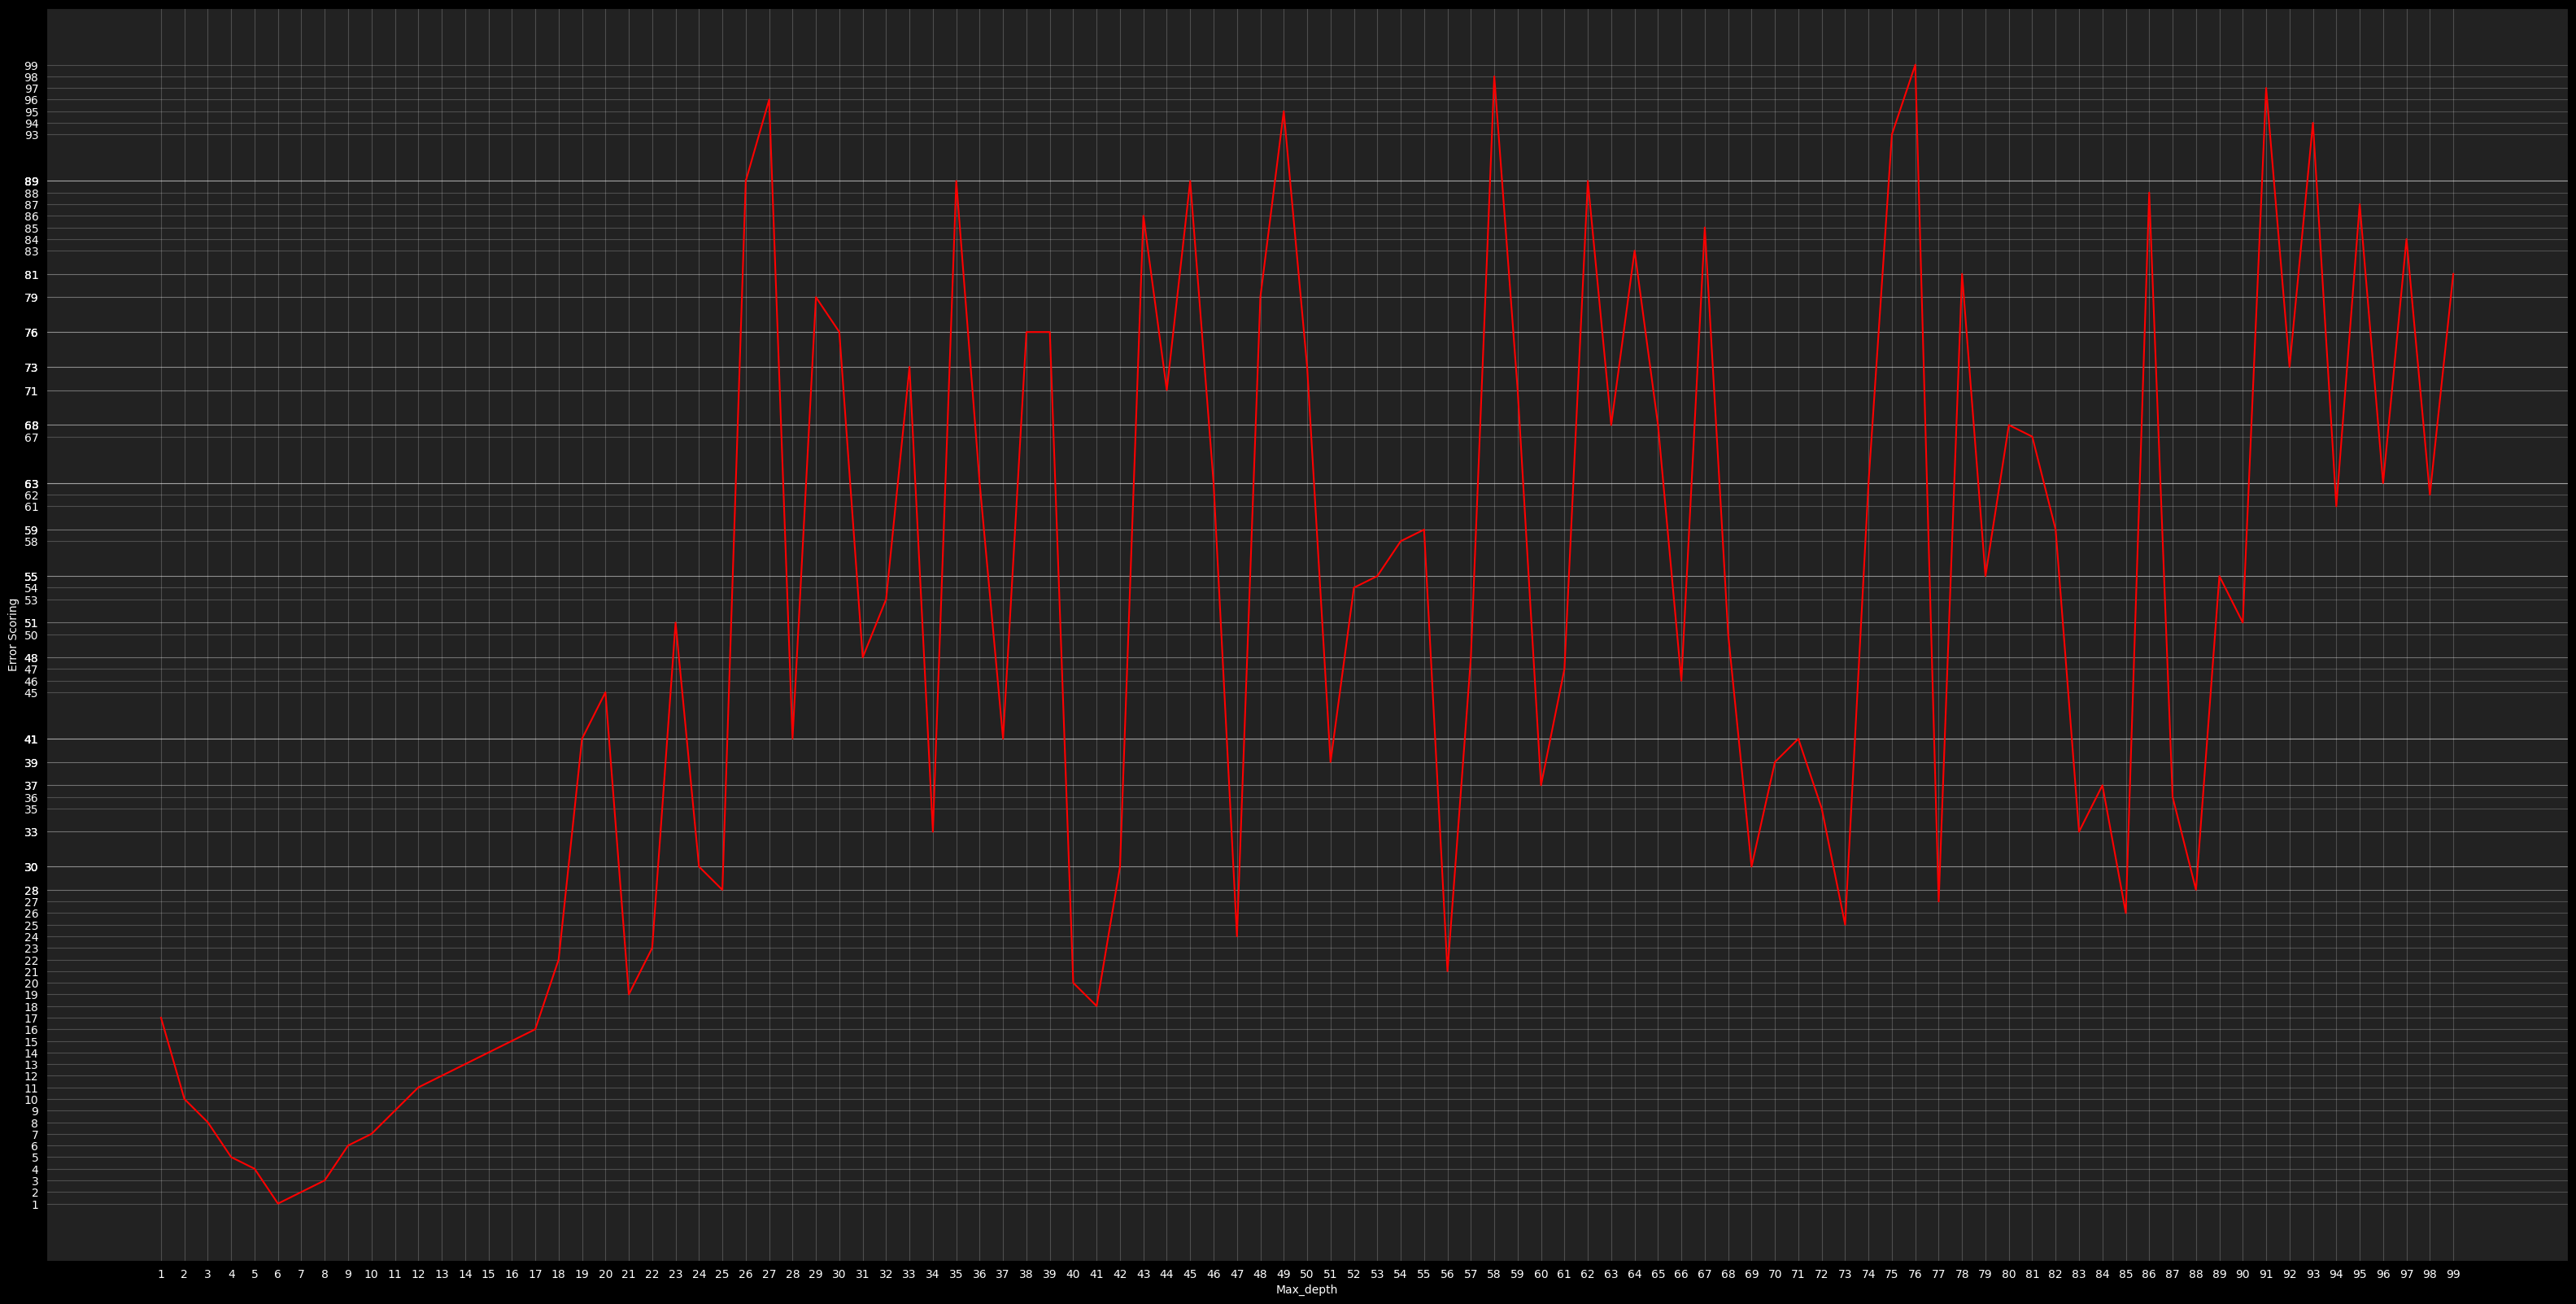

In [146]:
plt.figure(figsize = (40, 20), facecolor = 'black')
plt.plot(params['max_depth'], scores, color = 'red')
plt.xticks(params['max_depth'], color = "white")
plt.yticks(scores, color = "white")
plt.grid(alpha = 0.2, color = 'white')
plt.xlabel("Max_depth", color = 'white')
plt.ylabel("Error Scoring", color = 'white')

plt.gca().set_facecolor("#222222")

plt.show()

Classification report : 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Accuraccy score : 0.8605




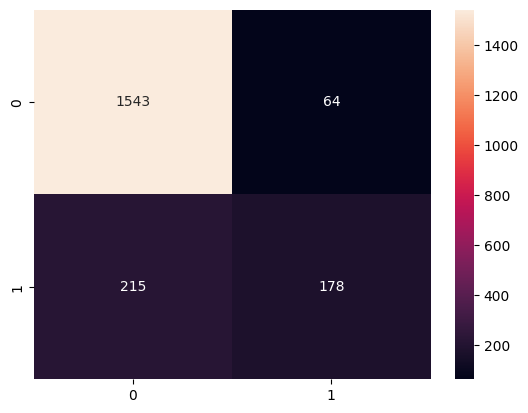

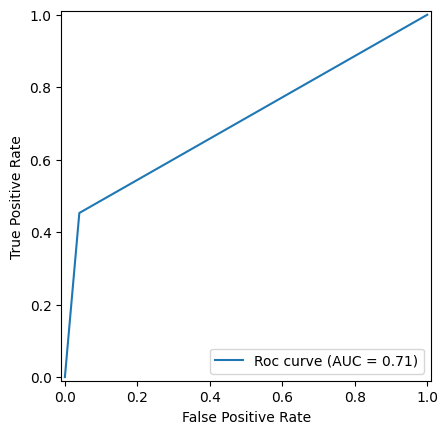

In [147]:
TREE_model = DecisionTreeClassifier(max_depth=6)
TREE_model.fit(X_train_prepared, y_train)

y_predict = TREE_model.predict(X_test_prepared)

print(f'Classification report : \n{metrics.classification_report(y_test, y_predict)}')
print(f'Accuraccy score : {metrics.accuracy_score(y_test, y_predict)}\n\n')

conf_matrix = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()

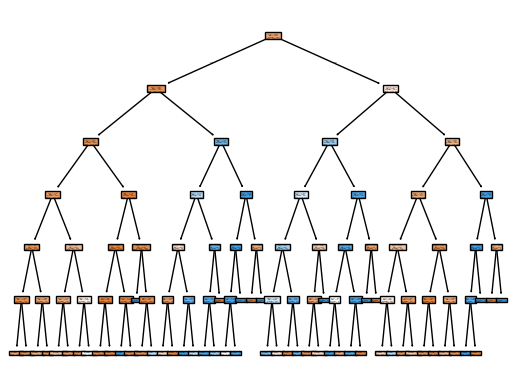

In [148]:
plot_tree(TREE_model, filled = True) # juda ham chuqur daraxt max_depth berilmaganda
plt.show()

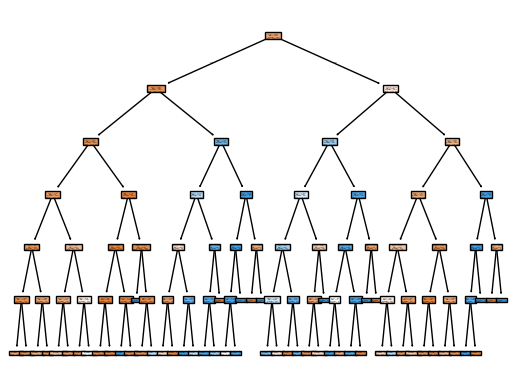

In [149]:
plot_tree(TREE_model, filled = True) # max_depth berilganda
plt.show()

# XGB Classifier model

Classification report : 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.69      0.50      0.58       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Accuraccy score : 0.858




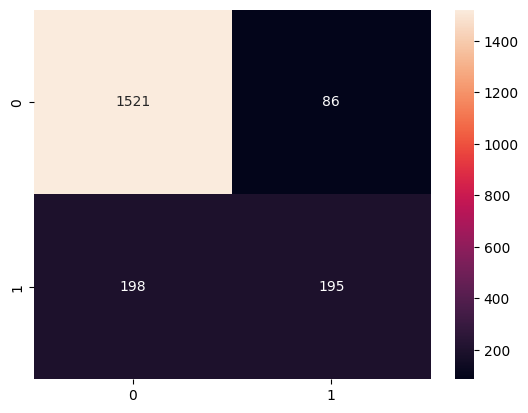

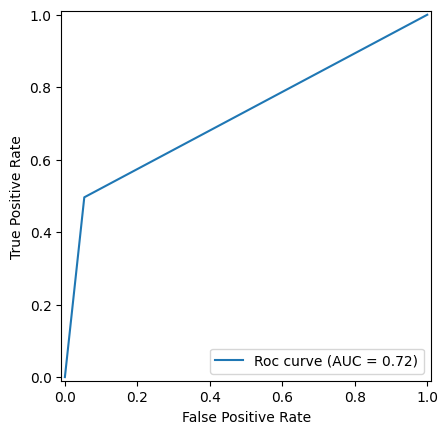

In [150]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train_prepared, y_train)

y_predict = XGB_model.predict(X_test_prepared)

print(f'Classification report : \n{metrics.classification_report(y_test, y_predict)}')
print(f'Accuraccy score : {metrics.accuracy_score(y_test, y_predict)}\n\n')

conf_matrix = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()

# Random Forest model

In [153]:
RF_model = RandomForestClassifier()
params = {'n_estimators' : np.arange(1, 100)}
RF_model_gs = GridSearchCV(estimator=RF_model, param_grid = params, cv = 5)
RF_model_gs.fit(X_full_prepared, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [168]:
scores = RF_model_gs.cv_results_['rank_test_score']
scores

array([99, 97, 98, 96, 95, 93, 94, 90, 89, 91, 92, 86, 87, 88, 85, 76, 73,
       82, 78, 80, 77, 80, 58, 71, 74, 66, 75, 83, 68, 84, 43, 72, 70, 69,
       48, 64, 20, 62, 57, 66, 65, 50, 16, 59, 42, 47, 62, 54, 79, 37, 38,
       38, 48, 61, 59, 32, 10, 45, 45,  5, 52, 19, 21,  9, 32, 22, 29, 16,
       29, 13, 23, 32, 55, 41,  8, 14, 55, 18, 50, 10,  7, 43,  6, 35, 31,
        1, 38, 15, 26,  2, 26, 10, 23, 23, 28,  2, 35,  4, 52],
      dtype=int32)

In [169]:
RF_model_gs.best_score_

np.float64(0.8645999999999999)

In [170]:
RF_model_gs.best_params_

{'n_estimators': np.int64(86)}

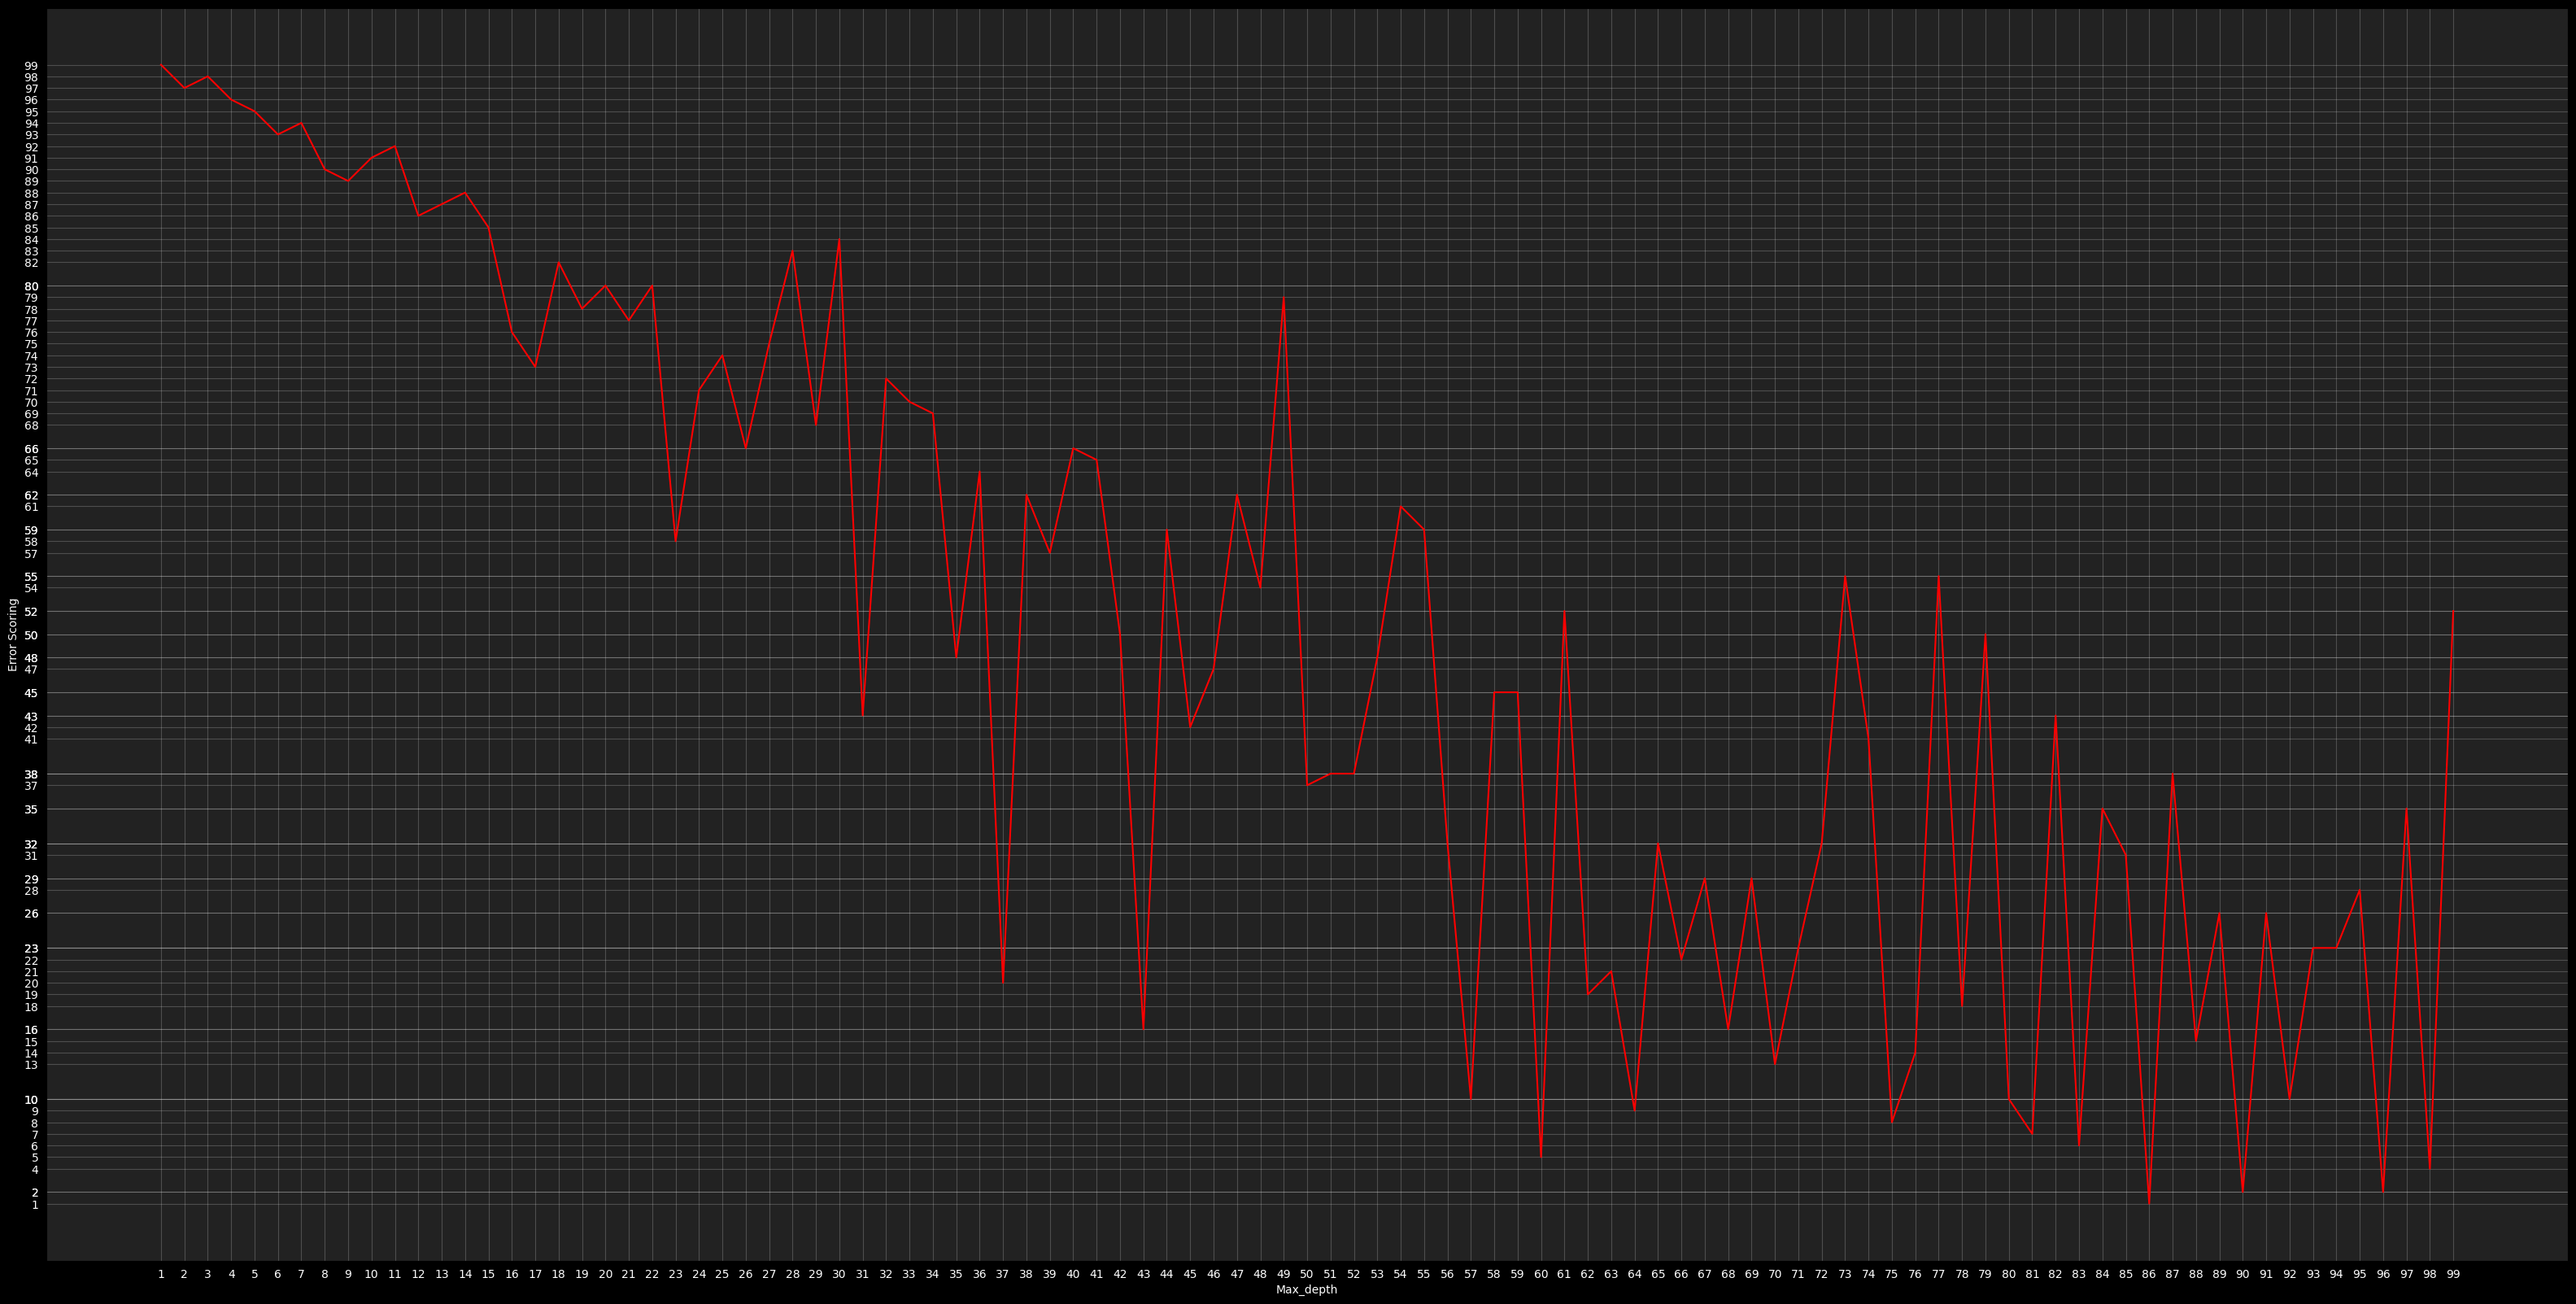

In [172]:
plt.figure(figsize = (40, 20), facecolor = 'black')
plt.plot(params['n_estimators'], scores, color = 'red')
plt.xticks(params['n_estimators'], color = "white")
plt.yticks(scores, color = "white")
plt.grid(alpha = 0.2, color = 'white')
plt.xlabel("Max_depth", color = 'white')
plt.ylabel("Error Scoring", color = 'white')

plt.gca().set_facecolor("#222222")

plt.show()

In [ ]:
plt.figure(figsize = (40, 20), facecolor = 'black')
plt.plot(params['max_depth'], scores, color = 'red')
plt.xticks(params['max_depth'], color = "white")
plt.yticks(scores, color = "white")
plt.grid(alpha = 0.2, color = 'white')
plt.xlabel("Max_depth", color = 'white')
plt.ylabel("Error Scoring", color = 'white')

plt.gca().set_facecolor("#222222")

plt.show()

Classification report : 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuraccy score : 0.8675




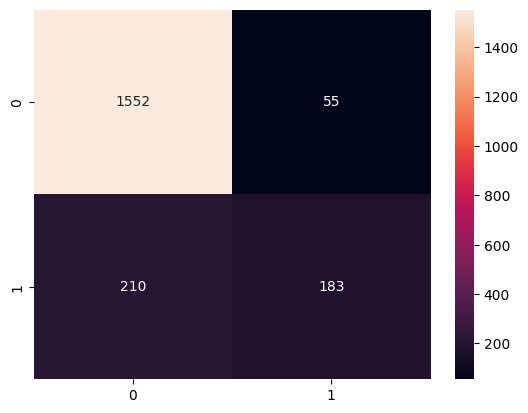

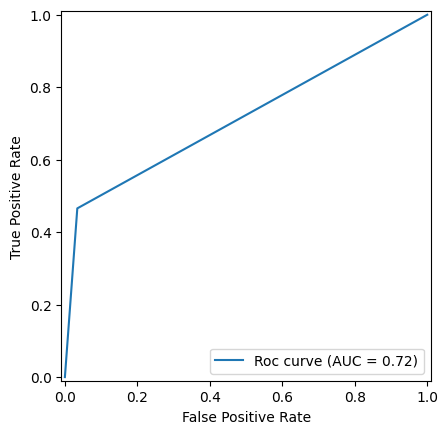

In [173]:
RF_model = RandomForestClassifier(n_estimators=86)
RF_model.fit(X_train_prepared, y_train)

y_predict = RF_model.predict(X_test_prepared)

print(f'Classification report : \n{metrics.classification_report(y_test, y_predict)}')
print(f'Accuraccy score : {metrics.accuracy_score(y_test, y_predict)}\n\n')

conf_matrix = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()

# Bu yerda xulosaga keladigan bo'lsam, correlatsiya unchalik kuchli emas shuning uchun modellarning aksar qismi accuracy score kam chiqdi, shunday bo'lsada 2 ta model nisbatan yaxshi chiqdi.

# Random Forest va XGBClassifier

# Bu ikkisidan XGBClassifier nisbat yaxshiroq ko'rsatkich berdi, va nisbatan train uchun kam vaqt oldi shuning uchun hozircha eng yaxshi model XGBClassifier

In [174]:
import pickle as p

with open("XGB_model.pkl", 'wb') as file:
    p.dump(XGB_model, file)